In [ ]:
import pandas as pd
import numpy as np
import nltk.corpus 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
#Models:
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from nltk.stem.porter import PorterStemmer #remove prefix and suffix in the words and return the word
from sklearn.feature_extraction.text import TfidfVectorizer #convert the text to numerical data
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [ ]:
#we change files from .tsv to csv
import pandas as pd 
tsv_file='train.tsv'
csv_table_train=pd.read_csv(tsv_file,sep='\t')
csv_table_train.to_csv('newtrain.csv',index=False)


In [ ]:
import pandas as pd 
tsv_file_test='test.tsv'
csv_table_test=pd.read_csv(tsv_file,sep='\t')
csv_table_test.to_csv('newtest.csv',index=False)

In [ ]:
import pandas as pd 
tsv_file='valid.tsv'
csv_table_valid=pd.read_csv(tsv_file,sep='\t')
csv_table_valid.to_csv('newvalid.csv',index=False)

In [ ]:
column = ['id','label','text','subject','speaker','job title','state info','party affiliation','barely true','false','half true','mostly true','pants on fire','context']

In [ ]:
#reading from the 3 files
train = pd.read_csv('newtrain.csv' ,header=None, names=column)
test = pd.read_csv('newtest.csv', header=None, names=column)
valid = pd.read_csv('newvalid.csv', header=None, names=column)

In [ ]:
train.head(10)

,id,label,text,subject,speaker,job title,state info,party affiliation,barely true,false,half true,mostly true,pants on fire,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.1,0.2,0.3,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa."
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video


In [ ]:
valid.head()

,id,label,text,subject,speaker,job title,state info,party affiliation,barely true,false,half true,mostly true,pants on fire,context
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1.1,0.1,0.2,an interview with ABC17 News
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8.0,5.0,105.0,NaN
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1.0,1.0,0.0,a U.S. Ways and Means hearing
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1.0,1.0,0.0,an opinion article
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160.0,163.0,9.0,interview with CBS News


In [ ]:
train.shape, test.shape, valid.shape

((10240, 14), (10240, 14), (1284, 14))

In [ ]:
data = pd.concat([train,test,valid])

In [ ]:
df = data.drop(columns=['id'])

In [ ]:
df.head()

,label,text,subject,speaker,job title,state info,party affiliation,barely true,false,half true,mostly true,pants on fire,context
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.1,0.2,0.3,a mailer
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [ ]:
#finding missing values
df.isnull().sum()

label                   0
text                    0
subject                 4
speaker                 4
job title            6139
state info           4695
party affiliation       4
barely true             4
false                   4
half true               4
mostly true             4
pants on fire           4
context               216
dtype: int64

In [ ]:
df.isnull().sum().sum()

11082

In [ ]:
df = df.dropna()
df.isnull().sum()

label                0
text                 0
subject              0
speaker              0
job title            0
state info           0
party affiliation    0
barely true          0
false                0
half true            0
mostly true          0
pants on fire        0
context              0
dtype: int64

In [ ]:
#changing label from test to number
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df["label"] = enc.fit_transform(df[["label"]])
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,label,text,subject,speaker,job title,state info,party affiliation,barely true,false,half true,mostly true,pants on fire,context
0,1.0,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.1,0.2,0.3,a mailer
1,2.0,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,3.0,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
5,5.0,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
7,2.0,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa."


In [ ]:
df['label'] = df['label'].astype('int')

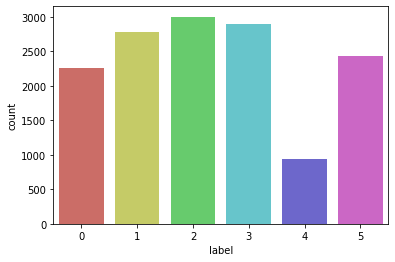

In [ ]:
#count of label column
# 0-barly true / 1-false / 2-half_true / 3-mostly_true / 4-pants on Fire / 5-true
sns.countplot(x='label', data=df, palette='hls')

In [ ]:
#articles based on subject
print(df.groupby(['subject'])['text'].count())

subject
Alcohol                                2
Alcohol,animals,children,crime         2
Alcohol,candidates-biography,crime     2
Alcohol,children                       2
Alcohol,children,drugs,marijuana       2
                                      ..
weather                               10
welfare                               13
women                                 10
women,workers                          2
workers                               17
Name: text, Length: 2938, dtype: int64


In [ ]:
data = df.drop(columns = ['subject','job title','state info','party affiliation','barely true','false','half true','mostly true','pants on fire'],axis=1)

In [ ]:
data.to_csv('final_dataset.csv',index=False)

In [ ]:
finalData = pd.read_csv('final_dataset.csv')
finalData.tail(20)

,label,text,speaker,context
14289,1,"Barack Obama has ""pledged to reduce the size o...",jerome-corsi,his book <i>The Obama Nation</i>.
14290,5,Says spending in the fiscal 2009 budget was lo...,barbara-buono,a state Senate budget hearing
14291,1,There is no statistical evidence that bail bon...,lena-taylor,an op-ed article
14292,3,"Household incomes are down more than $4,000 si...",donald-trump,his acceptance speech at the Republican Natiio...
14293,2,Says personhood legislation she sponsored woul...,joni-ernst,a debate
14294,5,"The Republican Party ""fought very hard in the ...",michael-steele,an interview on ABC's This Week
14295,1,A major part of the climate change bill sponso...,mitch-mcconnell,a Senate floor speech
14296,1,"Ohios credit rating is as high as you can get,...",john-kasich,comments on Fox News
14297,1,Says every day of a special session costs taxp...,sal-esquivel,an opinion article
14298,1,We've excluded lobbyists from policymaking jobs.,barack-obama,his State of the Union address


In [ ]:
X = finalData.iloc[:,1].values
Y = finalData.iloc[:,0].values
print(X)
print(Y)

['Says the Annies List political group supports third-trimester abortions on demand.'
 'When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.'
 'Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."'
 ...
 'For the first time in more than a decade, imports accounted for less than half of (the oil) we consumed.'
 'Says Donald Trump has bankrupted his companies not once, not twice but four times.'
 'No one claims the report vindicating New Jersey Gov. Chris Christie in the bridge scandal is conclusive.']
[1 2 3 ... 2 3 0]


In [ ]:
print(type(X))

<class 'numpy.ndarray'>


In [ ]:
print(type(Y))

<class 'numpy.ndarray'>


In [ ]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
port_sem = PorterStemmer()
def stemming(statement):
  stemmed_content = re.sub('[^a-zA-Z]', ' ', statement)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_sem.stem(word) for word in stemmed_content if not word in stopwords]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [ ]:
finalData['text'] = finalData['text'].apply(stemming)

In [ ]:
print(finalData['text'])

0        say anni list polit group support third trimes...
1        declin coal start start natur ga took start be...
2        hillari clinton agre john mccain vote give geo...
3        chicago bear start quarterback last year total...
4        person stage work activ last year pass along r...
                               ...                        
14304        say u rep charl bass want privat social secur
14305    past two year democrat spent money countri spe...
14306    first time decad import account less half oil ...
14307    say donald trump bankrupt compani twice four time
14308    one claim report vindic new jersey gov chri ch...
Name: text, Length: 14309, dtype: object


In [ ]:
finalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14309 entries, 0 to 14308
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    14309 non-null  int64 
 1   text     14309 non-null  object
 2   speaker  14309 non-null  object
 3   context  14309 non-null  object
dtypes: int64(1), object(3)
memory usage: 447.3+ KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state=0)

In [ ]:
#converting text into numerical values
vector = TfidfVectorizer()
tf_fit = vector.fit(X_train)
X_train_tf = tf_fit.transform(X_train)
X_test_tf = tf_fit.transform(X_test)

In [ ]:
X_train_tf.toarray().shape

(10731, 6224)

In [ ]:
#Deep learning part
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import keras
import tensorflow as tf



# MLP for Pima Indians Dataset with 10-fold cross validation via sklearn
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy


# multi-class classification with Keras
import pandas
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder



In [ ]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
#Model for the 5 algorithms
def models(X_train, y_train):
  
  #Naive Bayes
  from sklearn.naive_bayes import MultinomialNB
  nb = MultinomialNB()
  nb.fit(X_train, y_train)
  
  #Logistic Regression
  from sklearn.linear_model import LogisticRegression
  lg = LogisticRegression(random_state=0)
  lg.fit(X_train, y_train)

  #SVM
  from sklearn import svm
  svmmodel = svm.SVC(kernel='linear')
  svmmodel.fit(X_train, y_train)

  #KNN
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors=2)
  knn.fit(X_train, y_train)

  #Keras Model
  # from keras.models import Sequential
  # from keras.layers import Dense
  # # define the keras model
  # seqmodel = Sequential()
  # seqmodel.add(Dense(12, input_dim=8, activation='relu'))
  # seqmodel.add(Dense(8, activation='relu'))
  # seqmodel.add(Dense(1, activation='sigmoid'))
  
  # compile the keras model
  # seqmodel.compile(loss=keras.losses.mean_squared_error, optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

  # estimator = KerasClassifier(build_fn=seqmodel, epochs=200, batch_size=5, verbose=0)
  # kfold = KFold(n_splits=10, shuffle=True)
  # results = cross_val_score(estimator, X_train, y_train, cv=kfold)
  # print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

  #Neural Network
  from sklearn.neural_network import MLPClassifier
  nn = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
  nn.fit(X_train, y_train)



  # Print the accuracy score
  print("Naive Bayes Accuracy:",nb.score(X_train, y_train))
  print("Logistic Regression Accuracy:",lg.score(X_train, y_train))
  print("SVM Accuracy:",svmmodel.score(X_train, y_train))
  print("KNN Accuracy:",knn.score(X_train, y_train))
  print("NN Accuracy:",nn.score(X_train, y_train))



  return lg,svmmodel,nb,knn,nn


md = models(X_train_tf, y_train)
print("md",md)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Naive Bayes Accuracy: 0.6280868511788277
Logistic Regression Accuracy: 0.7029167831516168


In [ ]:
for i in md:
  print('Model',i)
  y_pred = i.predict(X_test_tf)

  # Print the Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix\n")
  print(cm)

  # Print the Classification Report
  cr = classification_report(y_test, y_pred)
  print("\n\nClassification Report\n")
  print(cr)

Model LogisticRegression(random_state=0)
Confusion Matrix

[[182 112 122  93   4  46]
 [ 67 339 142  86   6  72]
 [ 63  95 367 128   4  87]
 [ 40 108 142 360   2  94]
 [ 35  57  51  39  33  25]
 [ 38  71  94 108   2 264]]


Classification Report

              precision    recall  f1-score   support

           0       0.43      0.33      0.37       559
           1       0.43      0.48      0.45       712
           2       0.40      0.49      0.44       744
           3       0.44      0.48      0.46       746
           4       0.65      0.14      0.23       240
           5       0.45      0.46      0.45       577

    accuracy                           0.43      3578
   macro avg       0.47      0.40      0.40      3578
weighted avg       0.44      0.43      0.42      3578

Model SVC(kernel='linear')
Confusion Matrix

[[214 103 114  80   6  42]
 [ 74 352 122  96  13  55]
 [ 82 103 375 110   5  69]
 [ 53 100 141 368   3  81]
 [ 44  48  43  32  58  15]
 [ 46  67  82 110   3 269]]




ValueError: ignored